In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13,8)
#%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# APEX Gun example

In [3]:
import sys, os
root = os.path.join(os.getcwd(), '../')

sys.path.append(root)

INPUT_FILE = os.path.join(root,'templates/apex_gun/gpt.in')

from gpt import GPT

In [4]:
G = GPT(input_file=INPUT_FILE, verbose=True)

GPT.configure_gpt:
   Original input file "gpt.in" in "/Users/chrisonian/Code/GitHub/lume-gpt/templates/apex_gun"
   Configured to run in "/var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpaafekb42"


In [5]:
# Set some of these
variables_were_set = G.set_variables({'gun_peak_field':20e6,'gun_phase':0,'tmax': 4e-7, 'RadiusMax':.015,
                                      'Ntout':2000,
                                     'dtmin':0,
                                     'GBacc':8,
                                       'xacc':8
                                     })
print(variables_were_set)

{'gun_peak_field': True, 'gun_phase': True, 'tmax': True, 'RadiusMax': True, 'Ntout': True, 'dtmin': True, 'GBacc': True, 'xacc': True}


In [6]:
# Run
G.run()
print(G)
print('\nNumber of touts:',len(G.tout))

GPT.run_gpt:
   Running GPT...
   Writing gpt input file to "/var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpaafekb42/gpt.in"

General Particle Tracer - Oct 28 2014
   Loading GPT data from /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpaafekb42/gpt.out.gdf
   GDF data loaded, time ellapsed: 1.15821 (sec).
   Converting tout and screen data to ParticleGroup(s)
   Run finished, total time ellapsed: 1.59066 (sec)

GPT object:
   Original input file: gpt.in
   Template location: /Users/chrisonian/Code/GitHub/lume-gpt/templates/apex_gun
   Use temp directory: True

Run Control
   Run configured: True
   Work location: /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpaafekb42
   Timeout: None (sec)

Results
   Finished: True
   Error occured: False
   Run time: 1.5906648635864258 (sec)

Number of touts: 2000


# Plot trajectories

In [7]:
G.particles[0]._settable_array_keys

['x', 'px', 'y', 'py', 'z', 'pz', 't', 'status', 'weight', 'id']

In [8]:
import numpy as np
from matplotlib import pyplot as plt

# Make trajector structure here for now, should go somewhere else as a function



rs ={}
for t in G.particles:
    for ID in t['id']:
        idint=int(ID)
        res = np.where(t['id']==ID)
        index = res[0][0]
        
        if(ID not in rs.keys()):
            rs[idint]={'x':[],'y':[],'z':[], 't':[], 'GBz':[]}
        else:
            rs[idint]['x'].append(t['x'][index])
            rs[idint]['y'].append(t['y'][index])
            rs[idint]['z'].append(t['z'][index])
            rs[idint]['t'].append(t['t'][index])
          #  rs[idint]['GBz'].append(t['GBz'][index])
         

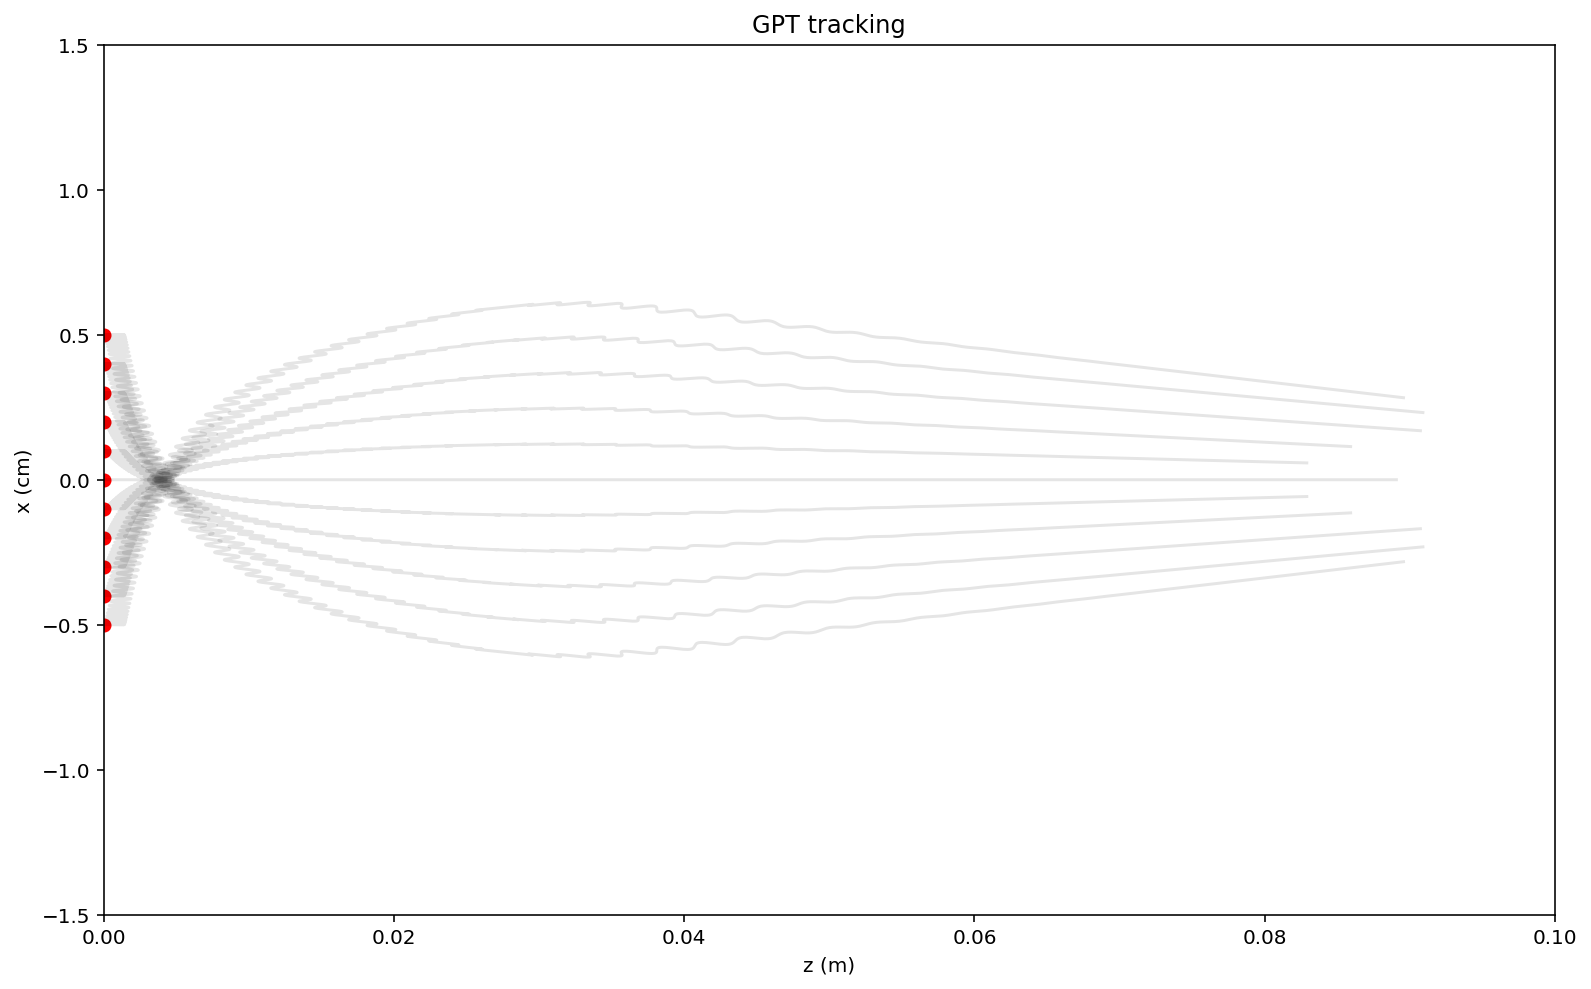

In [9]:
for ind in rs.keys():
    for var in rs[ind]:
        rs[ind][var]=np.array(rs[ind][var])

for ind in rs.keys():
    plt.plot(rs[ind]['z'][0],rs[ind]['x'][0]*1e2, color='red', marker='o')
    plt.plot(rs[ind]['z'],rs[ind]['x']*1e2, color='black', alpha=0.1)

plt.ylim(-1.5, 1.5)
plt.xlim(0, 0.1)
plt.title('GPT tracking')
plt.xlabel('z (m)');
plt.ylabel('x (cm)');